# An Analysis into the MOBA E-Sports Game - League of Legends

League of Legends is a Multiplayer Online Battle Arena (MOBA) video game that has become one of the most popular games in the world over the last 10 years. For those who have never heard of the game, or don't know how it works, this video is a great introduction: https://www.youtube.com/watch?v=BGtROJeMPeE. 

With the rise of popularity of E-Sports in main stream media and across cultures, League of Legends has become the poster child in the recent E-Sports world, in terms of viewership and revenue generation. National Basketball Association (NBA) organizations are starting to take ownership in these teams, and are starting to see a future for marketing their brand and generating revenue. Given this has been evolving over the last few years, sports analytics practices within the realm of video games is relatively new. With access to thousands of game stats via Riot's API, we are allowed to understand how the game is played amongst the public, and what factors of the game account for winning. 

### Abstract

What I attempted to explore through data exploration and modeling was to understand the components that are needed for teams to win throughout the duration of the game. Beyond the main objective of the game, there are underlying pieces of the game that can give teams an advantage of achieving the main objective first that aren't so obvious. I want to develop fundamental concepts of the game that will make players more efficient and could increase player's chances of winning. This analysis is a look at over 150,000 public games played from players across the globe, in hopes of understanding some key concepts when it comes to winning this game.

Some areas of the game this analysis explores are:

1) What statistics of the game are important for winning? Does their importance change for shorter games vs longer games?

2) What characteristics of team vision of the map differ between winning and losing teams? Is there a difference between roles?

3) What is the differing characteristics between winning teams and losing teams in regards to gold accumulation?

4) How likely is a team to win based on getting specific objectives first before the opposing team?

5) Do specific champions tend to win more than other champions? How about champions played in specific roles?

6) Are there champions that are better to play against other champions?

7) How can we predict which team will win before a game has started?

My key findings into exploring these questions further are:

1) In the beginning of the game, the main focus of gaining advantages over your opponent is acquiring gold. Gold leads to items that provide the advantages. The more gold you can acquire over your opponent over time results in better chances of winning the game. Gold is usually acquired in the beginning of the game from a few sources:

    1) Destroying Minions
    
    2) Getting Champion Kills
    
2) If a game duration extends (usually past 30 minutes), the focus of the game can become more macro that just acquiring gold. The advantages gain in the early game by acquiring gold and buying items eventually levels out, as there is a cap to how many items players can purchase. The focust of the game turns more into:

    1) How can we destroy turrets and inhibitors more efficiently than our opponents?
    
    2) How can we defend our base?
    
    3) How can our team composition be used to our advantage to winning?
    
    4) What neutral objectives should we focus on that can help us win?
    
3) There is a clear difference between winning and losing teams in regards to how many wards each team places in a game

4) There are clear advantages that some champions have over others and can be used to create advantages right at the beginning of the game

5) Predicting games before they start are greatly influences by a few factors:

    1) What champions were selected by each team?
    
    2) How well does a champion match up against their opponent's champion?
    
    3) How good is a player at playing that champion?
    
    4) How well has the player played in recent games?
    
Based on these findings a few recommendations I would provide to solidifying the fundamentals in teaching the game to someone would be:

1) Learn what champions are better in matchups against other champions

2) The most important parts of the early game for any player is to acquire gold better than their opponent to gain advantages

3) In the later phases of the game, understanding the macro strategies becomes the main focus for winning

4) Your odds of winning a game reflect the above items, plus having teammates that are comfortable with playing their selected champion

# Acquiring and scrubbing the data

In [2]:
# First thing I always to is load in the necessary libraries for data summarizing, cleaning, and exploratory analysis
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [3]:
#The below csv files come from Riot's API
champs = pd.read_csv('desktop/league of legends data/champs.csv') #Gives us the ID's of every champion in the game
matches = pd.read_csv('desktop/league of legends data/matches.csv') #Gives the basic information for identifying individual matches
participants = pd.read_csv('desktop/league of legends data/participants.csv') #Gives us what champions were selected for each team and role
stats1 = pd.read_csv('desktop/league of legends data/stats1.csv') #Provides game stats for the blue team
stats2 = pd.read_csv('desktop/league of legends data/stats2.csv') #Provides game stats for the red team
teamstats = pd.read_csv('desktop/league of legends data/teamstats.csv') #Provides overall game stats
df_6 = pd.read_csv('desktop/lol_data/data/data.csv') #saved champion matchup analysis

In [4]:
#Combining our dataframes into one, based on each matches ID
stats = stats1.append(stats2)
raw_df = pd.merge(participants, stats, how = 'left', on = ['id'], suffixes=('', '_y'))
raw_df = pd.merge(raw_df, champs, how = 'left', left_on = 'championid', right_on = 'id', suffixes=('','_y'))
raw_df = pd.merge(raw_df, matches, how = 'left', left_on = 'matchid', right_on = 'id', suffixes=('', '_y'))

In [5]:
print(raw_df.shape) #over 180,000 games
raw_df.head()

(1834520, 73)


,id,matchid,player,championid,ss1,ss2,role,position,win,item1,...,name,id_y,id_y,gameid,platformid,queueid,seasonid,duration,creation,version
0,9,10,1,19,4,11,NONE,JUNGLE,0.0,3748.0,...,Warwick,19,10,3187427022,EUW1,420,8,1909,1495068946860,7.10.187.9675
1,10,10,2,267,3,4,DUO_SUPPORT,BOT,0.0,2301.0,...,Nami,267,10,3187427022,EUW1,420,8,1909,1495068946860,7.10.187.9675
2,11,10,3,119,7,4,DUO_CARRY,BOT,0.0,1055.0,...,Draven,119,10,3187427022,EUW1,420,8,1909,1495068946860,7.10.187.9675
3,12,10,4,114,12,4,SOLO,TOP,0.0,1029.0,...,Fiora,114,10,3187427022,EUW1,420,8,1909,1495068946860,7.10.187.9675
4,13,10,5,112,4,3,SOLO,MID,0.0,3020.0,...,Viktor,112,10,3187427022,EUW1,420,8,1909,1495068946860,7.10.187.9675


In [6]:
raw_df[raw_df.matchid==11] # stats from a specific game

,id,matchid,player,championid,ss1,ss2,role,position,win,item1,...,name,id_y,id_y,gameid,platformid,queueid,seasonid,duration,creation,version
10,19,11,1,115,3,4,DUO_SUPPORT,BOT,0.0,3092.0,...,Ziggs,115,11,3187425281,EUW1,420,8,1693,1495066760778,7.10.187.9675
11,20,11,2,69,4,7,DUO_CARRY,BOT,0.0,3040.0,...,Cassiopeia,69,11,3187425281,EUW1,420,8,1693,1495066760778,7.10.187.9675
12,21,11,3,157,14,4,SOLO,MID,0.0,1038.0,...,Yasuo,157,11,3187425281,EUW1,420,8,1693,1495066760778,7.10.187.9675
13,22,11,4,4,4,12,SOLO,TOP,0.0,3157.0,...,Twisted Fate,4,11,3187425281,EUW1,420,8,1693,1495066760778,7.10.187.9675
14,23,11,5,28,4,11,NONE,JUNGLE,0.0,1402.0,...,Evelynn,28,11,3187425281,EUW1,420,8,1693,1495066760778,7.10.187.9675
15,24,11,6,51,7,4,DUO_CARRY,BOT,1.0,3046.0,...,Caitlyn,51,11,3187425281,EUW1,420,8,1693,1495066760778,7.10.187.9675
16,25,11,7,62,14,4,SOLO,TOP,1.0,1055.0,...,Wukong,62,11,3187425281,EUW1,420,8,1693,1495066760778,7.10.187.9675
17,26,11,8,134,4,1,SOLO,MID,1.0,3165.0,...,Syndra,134,11,3187425281,EUW1,420,8,1693,1495066760778,7.10.187.9675
18,27,11,9,43,14,4,DUO_SUPPORT,BOT,1.0,3092.0,...,Karma,43,11,3187425281,EUW1,420,8,1693,1495066760778,7.10.187.9675
19,28,11,10,19,4,11,NONE,JUNGLE,1.0,3748.0,...,Warwick,19,11,3187425281,EUW1,420,8,1693,1495066760778,7.10.187.9675


As we can see above, we can actually zero down on statistics for individual games. Based on the "gameid" and "platformid" we can actually go onto the League of Legends Match History website and view these games there. Below is the link related to the "matchid" equal to 11, which is shown above:

https://matchhistory.na.leagueoflegends.com/en/#match-details/EUW1/3187425281?tab=overview

### Data Scrubbing

In [41]:
#Given that 2 players typical play in the bottom position (carry and support) we needed to tweak our role column so that it reflects all five players on each team
def final_position(row):
    if row['role'] in ('DUO_SUPPORT', 'DUO_CARRY'):
        return row['role']
    else:
        return row['position']

raw_df['adjposition'] = raw_df.apply(final_position, axis = 1) 

raw_df['team'] = raw_df['player'].apply(lambda x: '1' if x <= 5 else '2')
raw_df['team_role'] = raw_df['team'] + ' - ' + raw_df['adjposition']

# remove matchids where multiple players picked the same role (like 2 TOP role on the same team) there should be 1 player per role
# also removed games where the 2 bot roles (carry and support) were not specified
remove_index = []
for i in ('1 - MID', '1 - TOP', '1 - DUO_SUPPORT', '1 - DUO_CARRY', '1 - JUNGLE', '2 - MID', '2 - TOP', '2 - DUO_SUPPORT', '2 - DUO_CARRY', '2 - JUNGLE'):
    df_remove = raw_df[raw_df['team_role'] == i].groupby('matchid').agg({'team_role':'count'})
    remove_index.extend(df_remove[df_remove['team_role']!=1].index.values)
remove_index.extend(raw_df[raw_df['adjposition'] == 'BOT']['matchid'].unique())
remove_index = list(set(remove_index))

raw_df = raw_df[~raw_df['matchid'].isin(remove_index)]

In [9]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1486362 entries, 0 to 1834519
Data columns (total 76 columns):
id                        1486362 non-null int64
matchid                   1486362 non-null int64
player                    1486362 non-null int64
championid                1486362 non-null int64
ss1                       1486362 non-null int64
ss2                       1486362 non-null int64
role                      1486362 non-null object
position                  1486362 non-null object
win                       1486359 non-null float64
item1                     1486359 non-null float64
item2                     1486359 non-null float64
item3                     1486359 non-null float64
item4                     1486359 non-null float64
item5                     1486359 non-null float64
item6                     1486359 non-null float64
trinket                   1486359 non-null float64
kills                     1486359 non-null float64
deaths                    1486359 

In [10]:
raw_df.describe()

,id,matchid,player,championid,ss1,ss2,win,item1,item2,item3,...,wardsplaced,wardskilled,firstblood,id_y,id_y,gameid,queueid,seasonid,duration,creation
count,1.486362e+06,1.486362e+06,1.486362e+06,1.486362e+06,1.486362e+06,1.486362e+06,1486359.0,1.486359e+06,1.486359e+06,1.486359e+06,...,1.486359e+06,1.486359e+06,1.486359e+06,1.486362e+06,1.486362e+06,1.486362e+06,1.486362e+06,1.486362e+06,1.486362e+06,1.486362e+06
mean,9.378890e+05,9.418466e+04,5.499989e+00,1.150869e+02,6.544213e+00,7.248357e+00,0.5,2.462399e+03,2.756524e+03,2.734424e+03,...,1.200909e+01,1.906831e+00,9.999939e-02,1.150869e+02,9.418466e+04,3.095622e+09,4.073119e+02,7.860727e+00,1.887524e+03,1.491337e+12
std,5.327801e+05,5.358717e+04,2.872284e+00,1.153687e+02,3.971506e+00,4.252550e+00,0.5,9.295989e+02,7.685986e+02,8.056573e+02,...,7.412150e+00,2.283670e+00,2.999993e-01,1.153687e+02,5.358717e+04,3.168420e+08,7.421171e+01,6.744396e-01,4.298470e+02,1.305169e+10
min,9.000000e+00,1.000000e+01,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+01,4.576003e+08,4.000000e+00,3.000000e+00,9.010000e+02,1.400522e+12
25%,4.783432e+05,4.796700e+04,3.000000e+00,4.000000e+01,4.000000e+00,4.000000e+00,0.0,1.409000e+03,3.006000e+03,3.006000e+03,...,7.000000e+00,0.000000e+00,0.000000e+00,4.000000e+01,4.796700e+04,3.164320e+09,4.200000e+02,8.000000e+00,1.581000e+03,1.493558e+12
50%,9.300855e+05,9.325000e+04,5.000000e+00,7.900000e+01,4.000000e+00,4.000000e+00,0.0,3.047000e+03,3.078000e+03,3.068000e+03,...,1.000000e+01,1.000000e+00,0.000000e+00,7.900000e+01,9.325000e+04,3.177638e+09,4.200000e+02,8.000000e+00,1.857000e+03,1.494384e+12
75%,1.399404e+06,1.405800e+05,8.000000e+00,1.270000e+02,1.100000e+01,1.100000e+01,1.0,3.142000e+03,3.153000e+03,3.117000e+03,...,1.500000e+01,3.000000e+00,0.000000e+00,1.270000e+02,1.405800e+05,3.186088e+09,4.200000e+02,8.000000e+00,2.158000e+03,1.494976e+12
max,1.865604e+06,1.875880e+05,1.000000e+01,4.980000e+02,2.100000e+01,2.100000e+01,1.0,3.933000e+03,3.933000e+03,3.933000e+03,...,6.900000e+02,8.600000e+01,1.000000e+00,4.980000e+02,1.875880e+05,3.197657e+09,4.400000e+02,8.000000e+00,4.991000e+03,1.496909e+12


With how many game statistics are given, I created a dataframe below that narrows down the stats I believe are most important in answering my questions above.

In [42]:
df = raw_df[['id', 'matchid', 'player', 'name', 'adjposition', 'team_role', 'win', 'kills', 'deaths', 'assists', 'turretkills','totdmgtochamp', 'totheal', 'totminionskilled', 'goldspent', 'totdmgtaken', 'inhibkills', 'pinksbought', 'wardsplaced', 'duration', 'platformid', 'seasonid', 'version', 'team', 'visionscore', 'ss1', 'ss2']]

# Statistics that correlate with winning

I first wanted to create a baseline statistic for winning. I calculated below what percent of blue teams win and what percent of red teams win. Think of these like home teams and away teams. We can see our baseline statistic that if we predicted the blue team to win every game, we would have about a 51% chance of being correct, basically a coin toss.

In [13]:
raw_df['team'] = raw_df['team'].map({'1': 'Blue', '2':'Red'})

def team_win_percent(dframe):
    blue_wins = len(dframe[(dframe.team == "Blue") & (dframe.win == 1)])
    red_wins = len(dframe[(dframe.team == "Red") & (dframe.win == 1)])
    tot_wins = len(dframe[dframe.win==1])
    print('Percent of Total Wins to Blue Team:', round(blue_wins/tot_wins*100,2),'%')
    print('Percent of Total Wins to Red Team:', round(red_wins/tot_wins*100,2),'%')
    
team_win_percent(raw_df)

Percent of Total Wins to Blue Team: 51.3 %
Percent of Total Wins to Red Team: 48.7 %


Taking statistics from the raw dataframe, I created multiple correlation matrix to see the correlations between them and whether the team won or not to understand their importance towards winning. I created the matrix's for games based on different durations, to see how some statistical importance changes. I created a correlation matrix for games based on the following durations:

1) All games

2) Games less than 20 minutes (this is when a team is allowed to surrender early)

3) Games between 20 and 30 minutes

4) Games between 30 and 40 minutes

5) Games longer than 40 minutes

In [14]:
from datetime import datetime, timedelta
print('Average length of game:', str(timedelta(seconds=round(df.duration.mean(),0))))

Average length of game: 0:31:28


In [179]:
#stats I used for correlation matrix
cor_df = raw_df[['win', 'kills', 'deaths', 'assists', 'largestkillingspree',
       'largestmultikill', 'killingsprees', 'longesttimespentliving',
       'doublekills', 'triplekills', 'quadrakills', 'pentakills',
       'totdmgtochamp', 'dmgtoobj', 'dmgtoturrets', 'visionscore',
       'totdmgtaken', 'enemyjunglekills', 'totminionskilled', 'wardsplaced',
       'goldearned', 'goldspent', 'turretkills', 'inhibkills', 'totheal',
       'duration']]

Text(0.5, 1.0, 'Correlations - Win vs Factors (all games)')

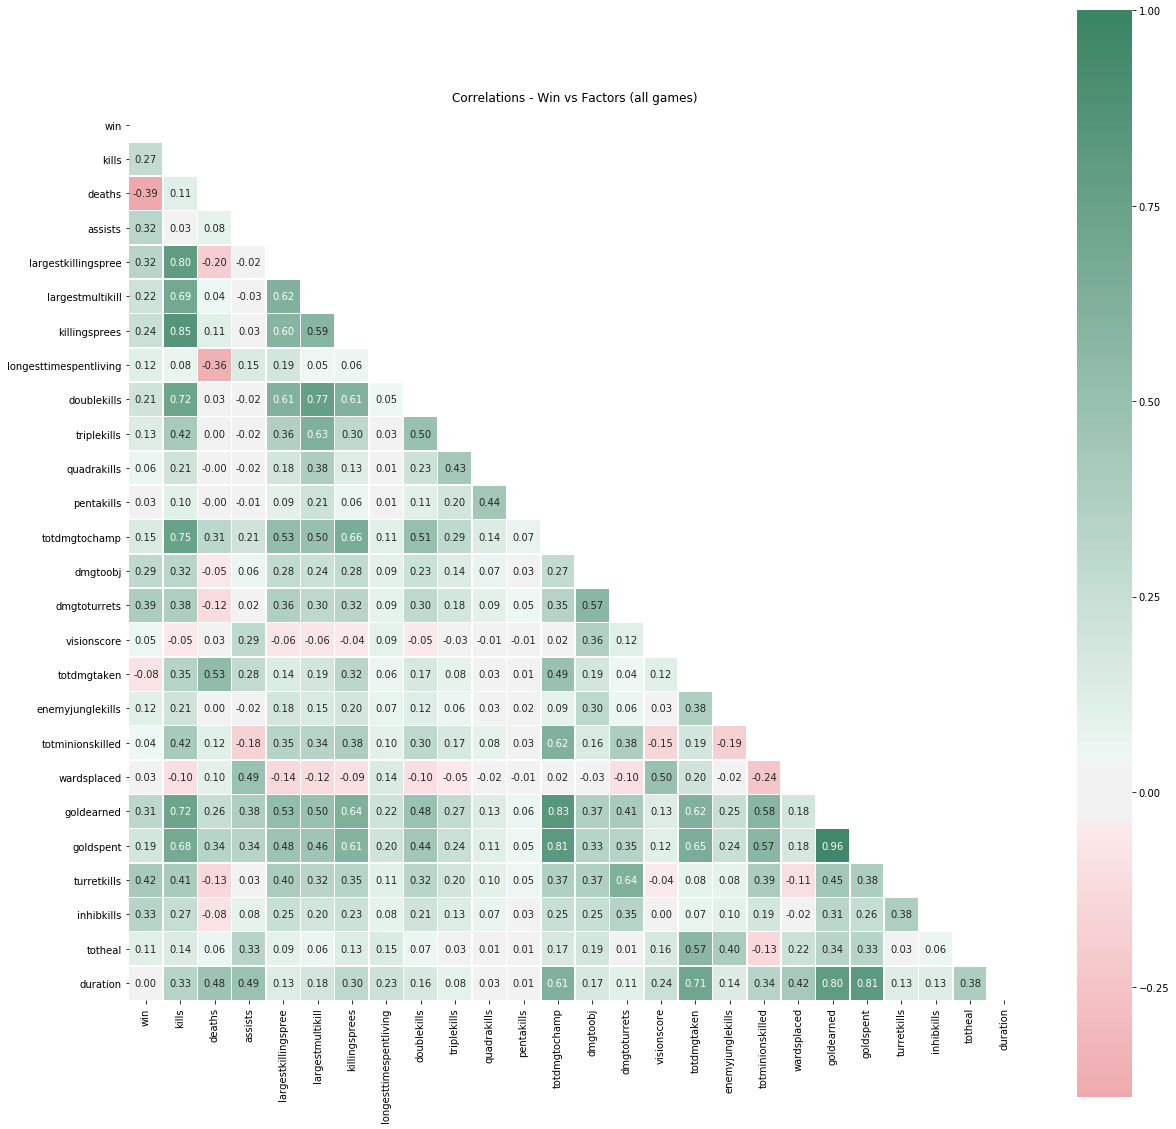

In [180]:
#code for creating the matrix.
df_corr = cor_df._get_numeric_data()

mask = np.zeros_like(df_corr.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
cmap = sns.diverging_palette(10, 150,  as_cmap=True)

plt.figure(figsize=(20,20))
sns.heatmap(df_corr.corr(), cmap = cmap, annot = True, fmt = '.2f', mask= mask, square=True, linewidths = .5, center = 0)
plt.title('Correlations - Win vs Factors (all games)')

Text(0.5, 1.0, 'Correlations - win vs factors (for games less than 20 mins)')

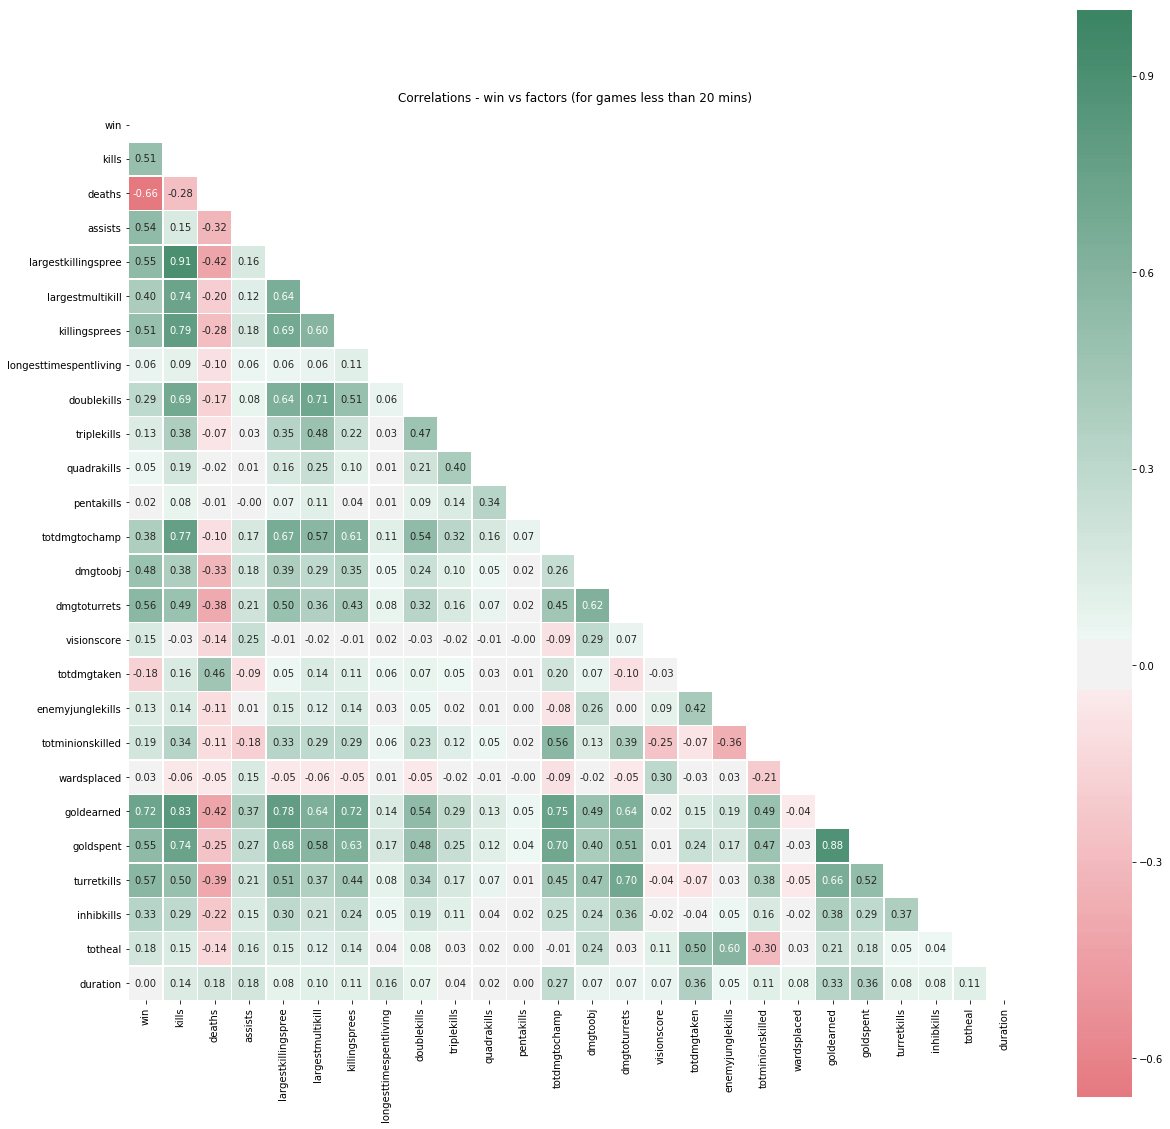

In [181]:
df_corr_2 = cor_df._get_numeric_data()
# for games less than 20mins
df_corr_2 = df_corr_2[df_corr_2['duration'] <= 1200]

mask = np.zeros_like(df_corr_2.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
cmap = sns.diverging_palette(10, 150, as_cmap=True)

plt.figure(figsize = (20,20))
sns.heatmap(df_corr_2.corr(), cmap = cmap, annot = True, fmt = '.2f', mask = mask, square=True, linewidths=.5, center = 0)
plt.title('Correlations - win vs factors (for games less than 20 mins)')

Text(0.5, 1.0, 'Correlations - win vs factors (for games between 20 and 30 mins)')

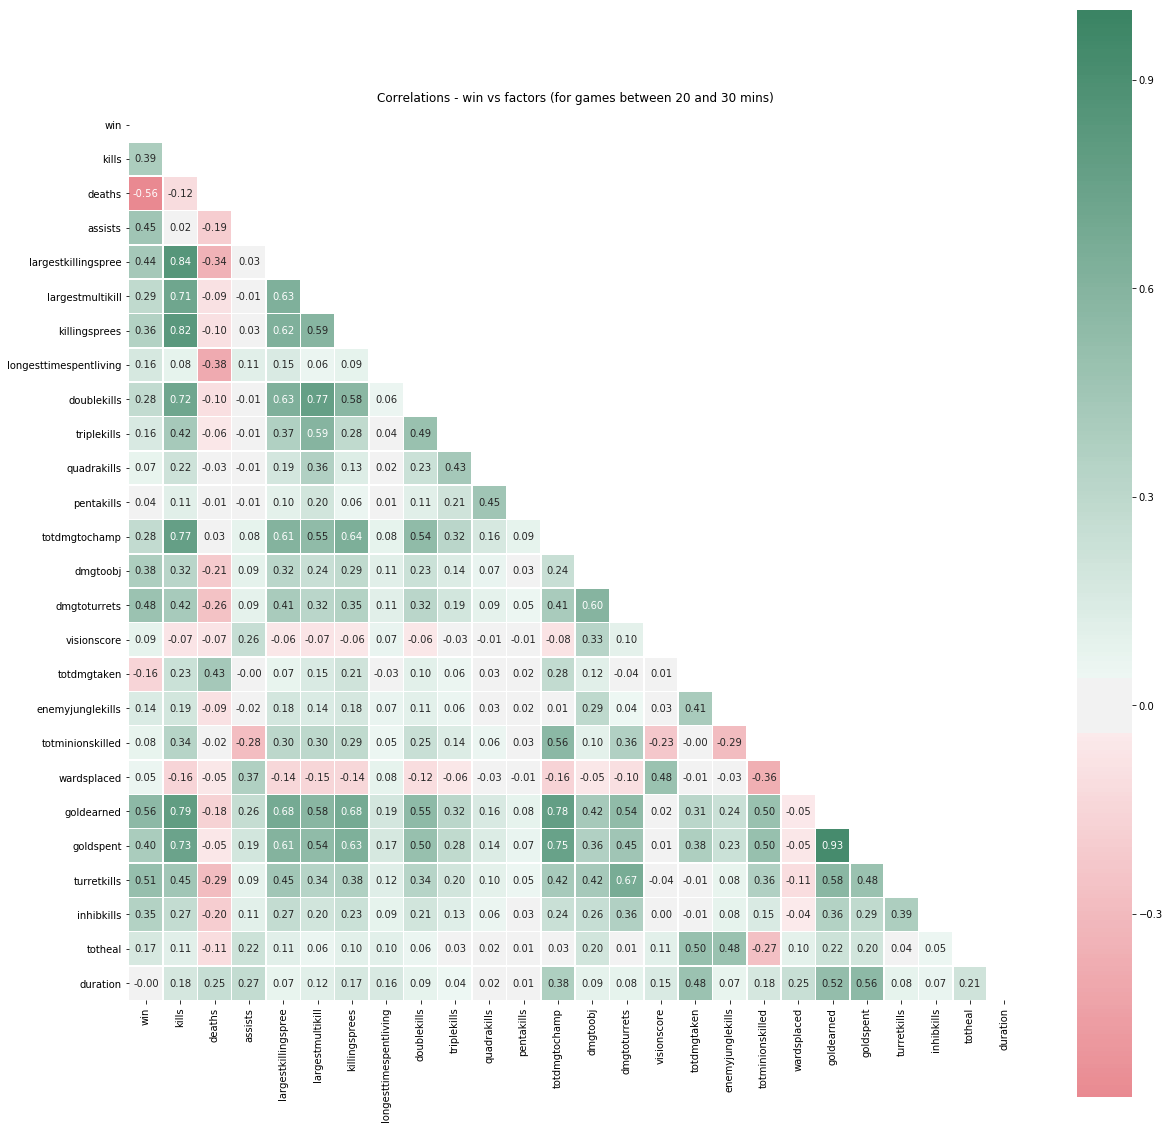

In [183]:
df_corr_2 = cor_df._get_numeric_data()
# for games between 20 and 30mins
df_corr_2 = df_corr_2[(df_corr_2['duration'] > 1200) & (df_corr_2['duration'] <= 1800) ]


mask = np.zeros_like(df_corr_2.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
cmap = sns.diverging_palette(10, 150, as_cmap=True)

plt.figure(figsize = (20,20))
sns.heatmap(df_corr_2.corr(), cmap = cmap, annot = True, fmt = '.2f', mask = mask, square=True, linewidths=.5, center = 0)
plt.title('Correlations - win vs factors (for games between 20 and 30 mins)')

Text(0.5, 1.0, 'Correlations - win vs factors (for games between 30 and 40 mins)')

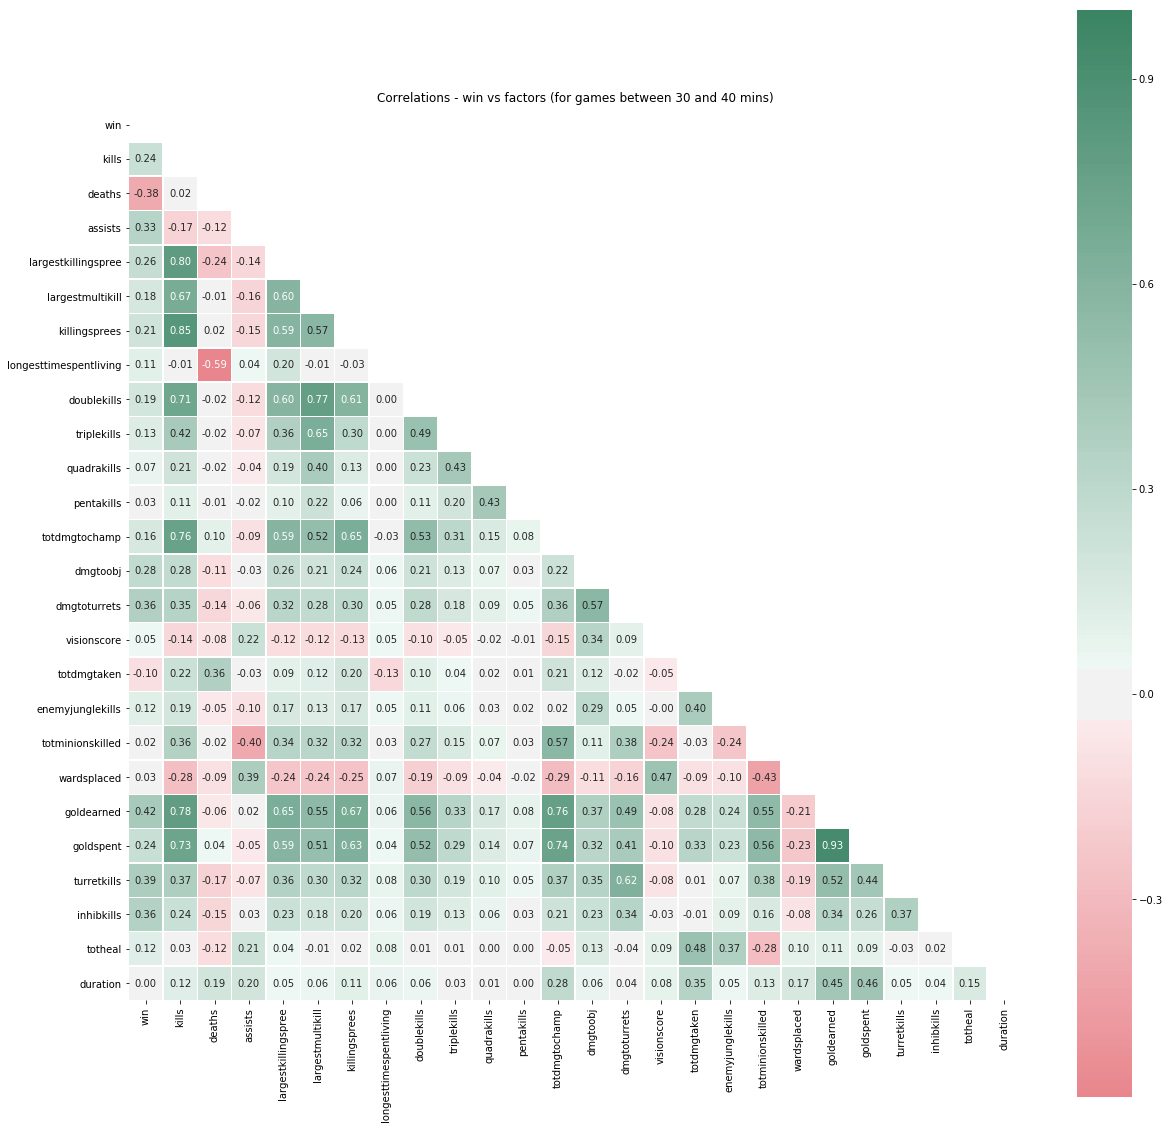

In [185]:
df_corr_2 = cor_df._get_numeric_data()
# for games between 30 and 40 mins
df_corr_2 = df_corr_2[(df_corr_2['duration'] > 1800) & (df_corr_2['duration'] <= 2400)]


mask = np.zeros_like(df_corr_2.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
cmap = sns.diverging_palette(10, 150, as_cmap=True)

plt.figure(figsize = (20,20))
sns.heatmap(df_corr_2.corr(), cmap = cmap, annot = True, fmt = '.2f', mask = mask, square=True, linewidths=.5, center = 0)
plt.title('Correlations - win vs factors (for games between 30 and 40 mins)')

Text(0.5, 1.0, 'Correlations - win vs factors (for games longer than 40 mins)')

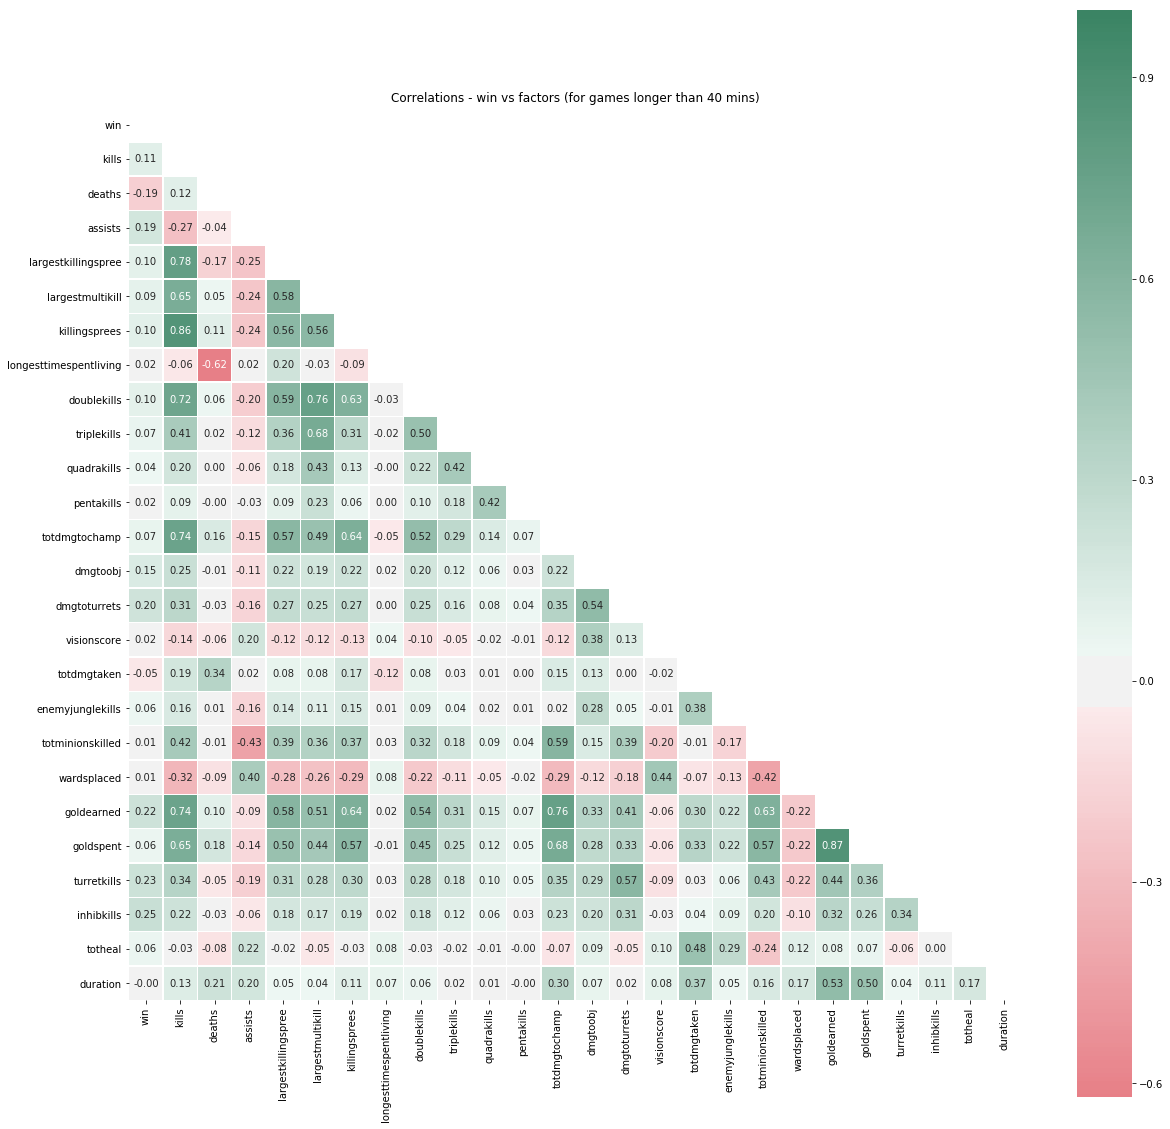

In [187]:
df_corr_2 = cor_df._get_numeric_data()
# for games more than 40 mins
df_corr_2 = df_corr_2[df_corr_2['duration'] > 2400]

mask = np.zeros_like(df_corr_2.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
cmap = sns.diverging_palette(10, 150, as_cmap=True)

plt.figure(figsize = (20,20))
sns.heatmap(df_corr_2.corr(), cmap = cmap, annot = True, fmt = '.2f', mask = mask, square=True, linewidths=.5, center = 0)
plt.title('Correlations - win vs factors (for games longer than 40 mins)')

### Findings:

1) The biggest correlations towards winning in general are turret kills, inhibitor kills, and champion kills/ deaths. This makes sense, as the only way to win the game is to destroy the opponents Nexus (home base), and the only way to do that is to first take down their turrets and then their inhibitors. Killing opponents is technically not necessary to win, but is unavoidable in a competitive match and is part of what creates advantages for teams.

2) For games that last less than 20 minutes champion kills/deaths have a much higher correlation towards winning. The reason for this is that games that end so quickly are usually the result of one team achieving numerous kills early in the game to the point where they are just too powerful to counter. This is known in the league of legends world as "snowballing".

3) As game durations become longer and longer, we can see that the correlations towards champion kills/deaths become less and less correlated, and turret and inhibitor kills become more and more correlate. This is because as a game progresses into longer and longer durations, there are caps towards what an individual player can do to make their champion have an advantage over their opponents:

    1) A Champions level caps at 18
    2) A Champion can only hold 6 items
    
So as a game progresses, it will get to a point where all players have their champions maxed out in terms of levels and items, and then it becomes a game of who can seige on their opponents base.

Based on these findings, as part of a basic strategy for any game, getting kills and accumulating gold early in the game is extremely important for a team's success. But as the game gets later into its duration, players will eventually hit their caps in terms of levels and items, and the game will become more of a macro decision type game.
    
 


# Warding differences between winning teams and losing teams

Warding is a part of the game where players can purchase and use what are called "Wards" to provide vision of an area on the map where the ward is placed. The game map has a "fog of war" element to it, which means each team can only see what their players can see, what their turrets and base can see, and what their minions can see. The only way to increase this vision to more areas on the map is to place wards. Wards are the way of tracking where players are on the map, which provides information on the opponent to help makes decisions as to what to do next.

To help me understand ward placing for winning and losing teams, I decided to create violin plots which show me both what a histogram and what a boxplot would show. I am able to determine the averages and frequencies of ward placement for both winning and losing teams. I created the violin plots based on a few factors:

1) how has ward placement changes through the seasons?

2) how is ward placement different between roles?

3) how has ward placement changes through the seasons for each role?

Text(0.5, 1.0, 'Ward Placement By Season')

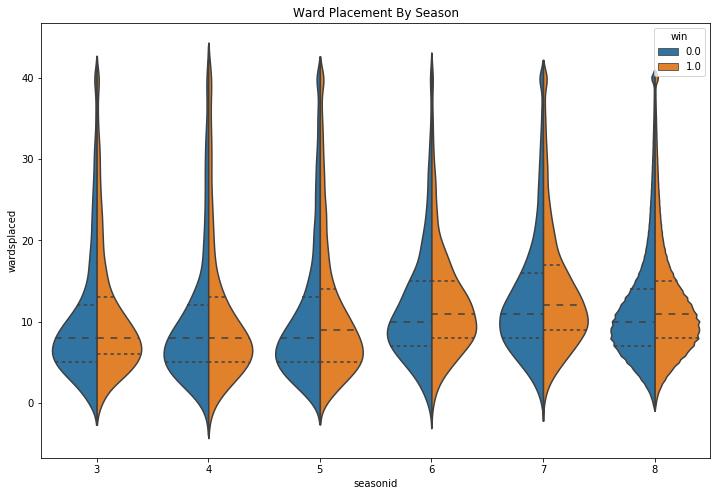

In [22]:
dfw = df.copy()
dfw['wardsplaced'] = dfw['wardsplaced'].apply(lambda x: x if x<40 else 40) #there are some games with large amounts of ward placement that distrupts the look of the violin plot
dfw['wardsplaced'] = dfw['wardsplaced'].apply(lambda x: x if x>0 else 0) #caps the max wards to 40
plt.figure(figsize=(12,8))
sns.violinplot(x='seasonid', y='wardsplaced', hue='win', data=dfw, split=True, inner='quartile')
plt.title('Ward Placement By Season')

Text(0.5, 1.0, 'Ward Placement By Position')

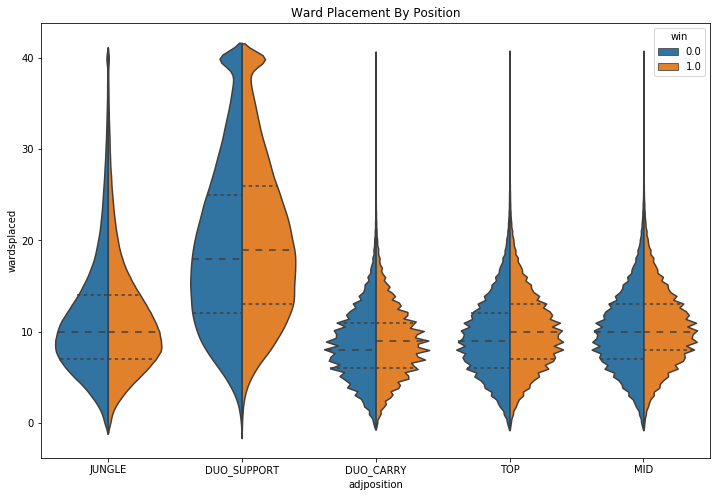

In [23]:
plt.figure(figsize=(12,8))
sns.violinplot(x='adjposition', y='wardsplaced', hue='win', data=dfw, split=True, inner='quartile')
plt.title('Ward Placement By Position')

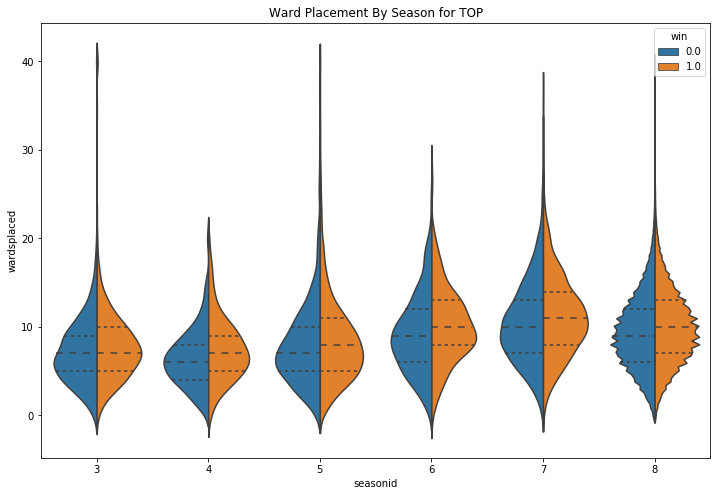

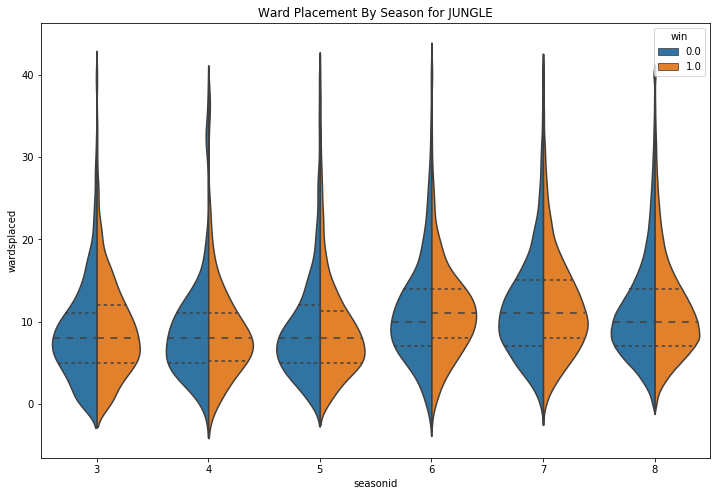

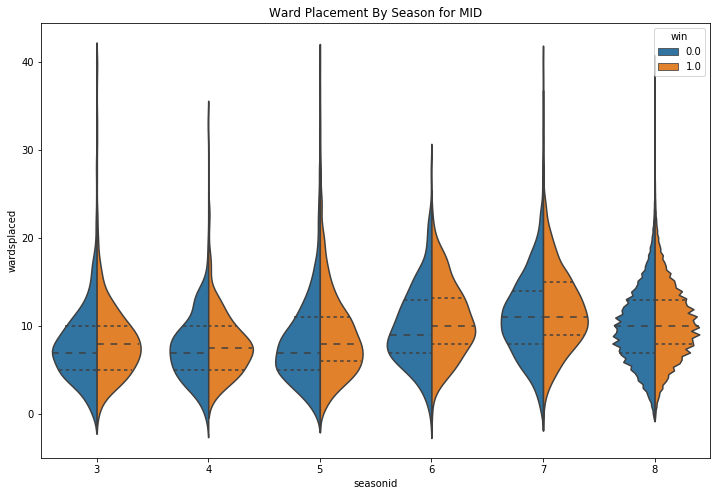

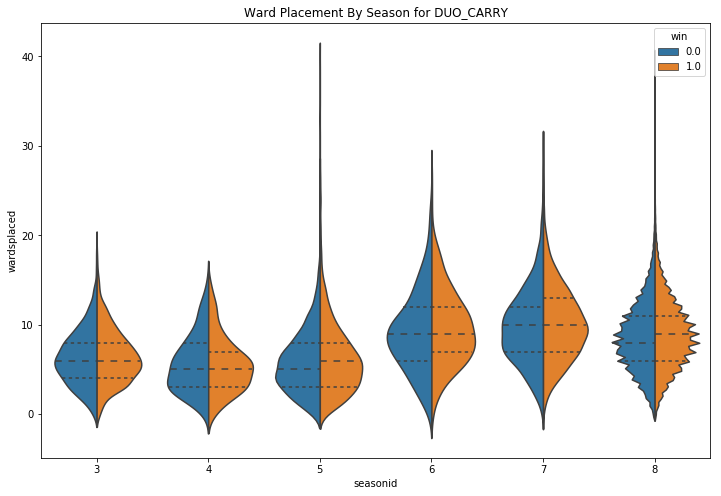

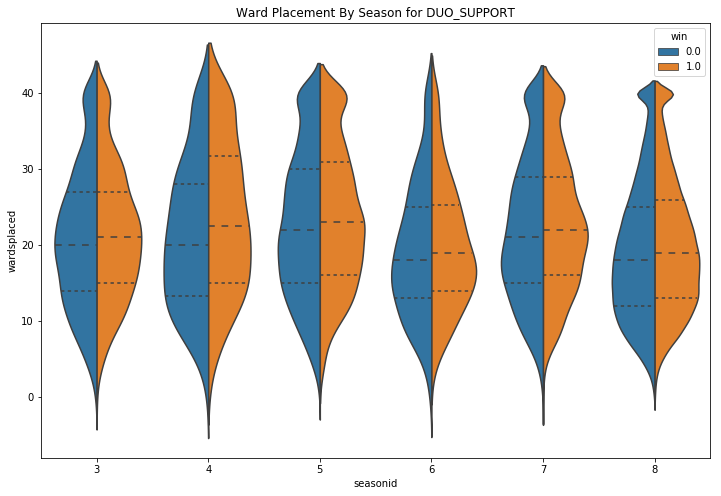

In [24]:
role = ['TOP', 'JUNGLE', 'MID', 'DUO_CARRY', 'DUO_SUPPORT']
d = {}
for r in role:
    d[r] = dfw[dfw.adjposition == r]

for k in d.keys(): 
    plt.figure(figsize=(12,8))
    sns.violinplot(x='seasonid', y='wardsplaced', hue='win', data=d[k], split=True, inner='quartile')
    plt.title('Ward Placement By Season for %s' %k)

When comparing ward placements over the past 5 seasons, we can see that the overall average amount has increased every season. Also, you can see that the winning team has higher ward placement when compared to the losing team in the more recent seasons. When looking at ward placement by role, you can see that support players place way more wards compared to the other roles. It has become a "meta" of the game for support players to be the one to use their gold to buy wards to provide their teammates vision around the map. It is no suprise to see these trends by role. Based on these violin plots, winning teams tend to place more wards overall.

# Gold spending difference between winning and losing teams

During live professional League of Legends matches, one of the key statistics that can tell a large portion of how the game is going in terms of leads for a teams is a team's gold lead compared to their opoonents. Teams with a large gold lead after a certain amount of time tend to win games more. I was curious on how big of leads gold difference can be for teams that typically decides games. Below, I wanted to see what percent of the total gold spent each game goes towards both teams, and what percent of winning teams have gold advantage at the end of the game.

In [29]:
df['team'] = df['team'].map({'1': 'Blue', '2':'Red'}) #helps with labeling the teams

In [30]:
#creating a dataframe containing the gold spent for each team
df_gold = df[['matchid', 'player', 'team','goldspent','win']].pivot_table(index='matchid', columns=['team'], values = 'goldspent', aggfunc='sum')

In [31]:
df_gold.head()

team,Blue,Red
matchid,,
10,51193.0,63133.0
11,51280.0,53060.0
12,38100.0,44493.0
14,60765.0,57945.0
15,48135.0,35550.0


In [32]:
df_gold['Blue_Gold_Percent'] = df_gold.Blue / (df_gold.Blue + df_gold.Red)
df_gold['Red_Gold_Percent'] = df_gold.Red / (df_gold.Blue + df_gold.Red)
df_gold['Winner'] = np.array(df.win[df.player==1])
df_gold['Winner'] = df_gold['Winner'].map({1.0: 'Blue', 0.0: 'Red'})
df_gold['Red Gold Diff'] = df_gold['Red_Gold_Percent'] - df_gold['Blue_Gold_Percent']

In [33]:
#creating the feature for percent of total gold spent for each team, as well as the difference between the winning and losing team
def gold_diff(row):
    if row['Winner'] == 'Red':
        val = row['Red_Gold_Percent'] - row['Blue_Gold_Percent']
    else:
        val = row['Blue_Gold_Percent'] - row['Red_Gold_Percent']
    return val

df_gold['Winner Gold Diff'] = df_gold.apply(gold_diff, axis=1)

In [35]:
#gives the percent of winning teams who had a gold advantage at the end of the game
def gold_adv_winners(dframe, team):
    team_gold_adv = len(dframe[(dframe[team+'_Gold_Percent'] > 0.5) & (dframe['Winner'] == team) ])
    team_winners = len(dframe[dframe['Winner'] == team])
    print('Percent of' ,team, 'Winners who had Gold Advantage:', round(team_gold_adv/team_winners*100,2),'%')
    
gold_adv_winners(df_gold, "Blue")
gold_adv_winners(df_gold, "Red")

Percent of Blue Winners who had Gold Advantage: 88.21 %
Percent of Red Winners who had Gold Advantage: 89.34 %


In [36]:
def team_gold_stats(team, opp, dframe):
    tdf = pd.DataFrame(dframe[[team +'_Gold_Percent']].copy() - 0.5)
    tdf.columns = ['Gold_Percent']
    tdf['Gold_Spent_Diff'] = dframe[team] - df_gold[opp]
    tdf['win'] = dframe['Winner']
    tdf['win'] = tdf['win'].map({opp: 0, team: 1})
    return tdf

team_gold_df = team_gold_stats("Blue", "Red", df_gold).append(team_gold_stats("Red", "Blue", df_gold))
team_gold_df.head()

,Gold_Percent,Gold_Spent_Diff,win
matchid,,,
10,-0.052219,-11940.0,0
11,-0.008530,-1780.0,0
12,-0.038702,-6393.0,0
14,0.011878,2820.0,0
15,0.075193,12585.0,1


Text(0.5, 0, '0 = Losers & 1 = Winners')

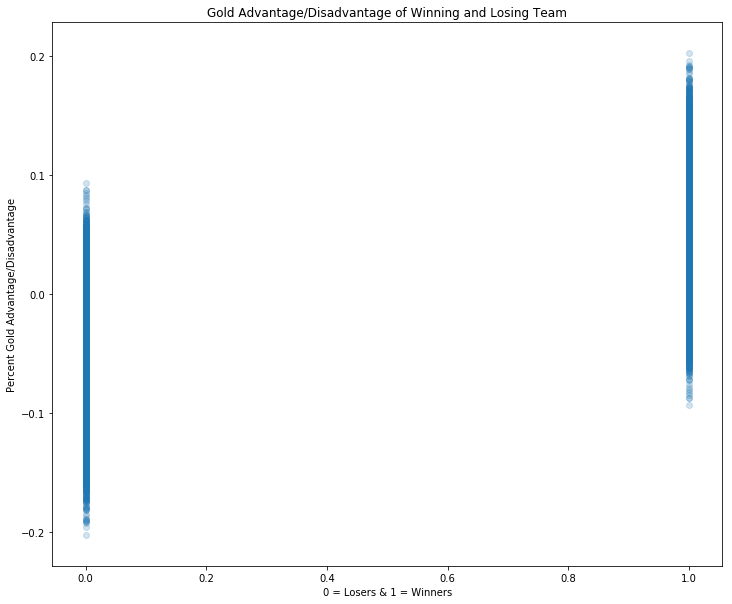

In [45]:
plt.figure(figsize=(12,10))
plt.scatter(x=team_gold_df['win'], y=team_gold_df['Gold_Percent'], alpha = 0.2)
plt.title('Gold Advantage/Disadvantage of Winning and Losing Team')
plt.ylabel('Percent Gold Advantage/Disadvantage')
plt.xlabel('0 = Losers & 1 = Winners')

Things I learned going through the gold difference analysis:

1) 89% of winning teams had a total gold advantage at the end of the game.

2) Of those team who don't have gold advantage, the minimum percent of total gold spent by a winning team seems to not go below 40% of total, 

3) teams typically dont acquired over 60% of the total game gold.

# Impact of getting certain game objectives first

There are some objectives, including turrets and inhibitors, that teams can organize in achieving that can provide advantages to winning the game. Below are the list of objectives that teams can get:

1) First blood (player who gets the first kill of the game gets bonus gold)

2) First turret (team who gets the first turret of the game gets bonus gold)

3) First inhibitor

4) First dragon (neutral objective that gives the team a unique bonus stat)

5) First baron (neutral objective that gives the team and their minions a unique bonus stat for a limited time)

I wanted to analyze how important getting some of these objectives first are in achieving victory.

In [38]:
teamstats[teamstats.matchid == 11]

,matchid,teamid,firstblood,firsttower,firstinhib,firstbaron,firstdragon,firstharry,towerkills,inhibkills,baronkills,dragonkills,harrykills
2,11,100,1,0,0,0,0,0,2,0,0,0,0
3,11,200,0,1,1,0,1,0,10,3,0,2,0


In [39]:
#cleaning up our dataframe for further analysis
def teamstat_team_cleanup(dframe, team, opp, teamid):
    matchid_lst = list(df.matchid.unique())
    tdf = dframe[dframe['teamid'] == teamid]
    tdf = tdf.loc[tdf['matchid'].isin(matchid_lst)]
    tdf.set_index('matchid', inplace=True)
    tdf['win'] = df_gold['Winner'].map({opp: 0, team: 1})
    return tdf

teamstats_wins = teamstat_team_cleanup(teamstats, "Blue", "Red", 100).append(teamstat_team_cleanup(teamstats, "Red", "Blue", 200))

In [46]:
#given dragon and baron are neutral objectives, some games might not have these objectives achieved
def baron_drag_teamstates(dframe, team1, team2, team1id):
    tdf = teamstat_team_cleanup(dframe, team1, team2, team1id)[['baronkills','dragonkills']]
    tdf.columns = [team1+'_B_Kills',team1+'_D_Kills']
    return tdf

In [47]:
b_d_df = baron_drag_teamstates(teamstats, "Blue", "Red", 100)
b_d_df = b_d_df.join(baron_drag_teamstates(teamstats, "Red", "Blue", 200))
b_d_df['B_Kills'] = b_d_df['Blue_B_Kills'] + b_d_df['Red_B_Kills']
b_d_df['D_Kills'] = b_d_df['Blue_D_Kills'] + b_d_df['Red_D_Kills']
b_d_df['win'] = df_gold['Winner']

In [48]:
#returns percent of teams that win the game if they get objectives first
def firsts_win_percent(dframe, b_d, team, teamid):
    team_wins = int(len(dframe[(dframe.win == 1) & (dframe.teamid == teamid)]))
    b_wins = int(len(b_d[(b_d.B_Kills > 0) & (b_d.win == team)])) 
    d_wins = int(len(b_d[(b_d.D_Kills > 0) & (b_d.win == team)]))
    denom_list = [team_wins, team_wins, team_wins, b_wins, d_wins]
    obj_list = ['blood', 'tower', 'inhib', 'baron', 'dragon']
    obj_results = []
    count = 0
    for objective in obj_list:
        obj_results.append(int(len(dframe[(dframe['first'+objective] == 1) & (dframe.win == 1) & (dframe.teamid == teamid)]))) 
        print("Percent of", team,"teams that get first", objective, "that win the game:", round(int(obj_results[count])/denom_list[count]*100,2),"%")
        count+=1

In [52]:
firsts_win_percent(teamstats_wins, b_d_df, "Red", 200)
firsts_win_percent(teamstats_wins, b_d_df, "Blue", 100)

Percent of Red teams that get first blood that win the game: 58.14 %
Percent of Red teams that get first tower that win the game: 69.92 %
Percent of Red teams that get first inhib that win the game: 85.54 %
Percent of Red teams that get first baron that win the game: 82.86 %
Percent of Red teams that get first dragon that win the game: 68.17 %
Percent of Blue teams that get first blood that win the game: 60.06 %
Percent of Blue teams that get first tower that win the game: 72.05 %
Percent of Blue teams that get first inhib that win the game: 86.39 %
Percent of Blue teams that get first baron that win the game: 79.41 %
Percent of Blue teams that get first dragon that win the game: 67.04 %


In [50]:
def percent_team_first_obj(team, teamid, objective):
    first_obj_count = len(teamstats_wins[(teamstats_wins['teamid'] == teamid) & (teamstats_wins['first'+objective] == 1)])
    if objective == 'dragon':
        games_with_obj = int(len(b_d_df[(b_d_df.D_Kills > 0)]))
    else:
        games_with_obj = int(len(b_d_df[(b_d_df.B_Kills > 0)]))
    print('Percent of games', team, 'team gets first', objective, ':', round(first_obj_count/games_with_obj*100,2),'%')

In [53]:
percent_team_first_obj('Red', 200, 'dragon')
percent_team_first_obj('Red', 200, 'baron')
percent_team_first_obj('Blue', 100, 'dragon')
percent_team_first_obj('Blue', 100, 'baron')

Percent of games Red team gets first dragon : 50.13 %
Percent of games Red team gets first baron : 52.09 %
Percent of games Blue team gets first dragon : 49.87 %
Percent of games Blue team gets first baron : 47.91 %


The most important objectives of the game look to be the first baron and first inhibitor, as over 80% of teams who get either first baron or first inhibitor end up winning the game. Typically, these objectives are achieved later in the game, when advantages are already created for teams by achieving tower kills and champion kills.

# Champion Analysis and Matchups

There are currently 130 champions to select to play in league of legends. They all have their unique skills and abilities. Some champions are suited for different roles, some have clear advantages over each other, and some have great synergies with others. Having a way of understanding champions overall effectivness in public games to win games can help analysts great team compositions revolving around the champion's strengths. Also, understanding why certain champions and synergies work well against other champions and synergies can help analysts and players better understand why.

Below are a few analysis I've done revolving around the actual champions of the game:

1) Which champions overall have good win rates in general?

2) Which champions counter specific champions?

3) Which bottom lane synergies have good win rates?

4) Which bottom lane synergies counter other bottom lane synergies?

In [194]:
# takes every champion and calculates their kills, deaths, assists, KDA, and win rate overal, regardless of what role they chose

pd.options.display.float_format = '{:,.1f}'.format

df_win_rate = df.groupby('name').agg({'win': 'sum', 'name': 'count', 'kills': 'mean', 'deaths': 'mean', 'assists': 'mean'})
df_win_rate.columns = ['win matches', 'total matches', 'K', 'D', 'A']
df_win_rate['win rate'] = df_win_rate['win matches'] /  df_win_rate['total matches'] * 100
df_win_rate['KDA'] = (df_win_rate['K'] + df_win_rate['A']) / df_win_rate['D']
df_win_rate = df_win_rate.sort_values('win rate', ascending = False)
df_win_rate = df_win_rate[['win rate', 'K', 'D', 'A', 'KDA']]


print('Top 10 win rate')
print(df_win_rate.head(10))
print('Bottom 5 win rate')
print(df_win_rate.tail(5))

Top 10 win rate
          win rate   K   D    A  KDA
name                                
Ivern         55.9 2.6 4.2 13.3  3.8
Anivia        54.0 6.4 4.8  7.5  2.9
Xerath        53.6 7.3 5.4  8.6  2.9
Ahri          53.5 7.3 5.6  7.7  2.7
Sona          53.1 3.0 5.7 13.9  2.9
Skarner       53.1 4.8 5.0  9.2  2.8
Zilean        53.0 3.2 4.7 11.9  3.2
KogMaw        52.7 7.9 6.6  7.1  2.3
Janna         52.7 0.9 4.0 14.5  3.8
Pantheon      52.6 8.1 6.5  6.8  2.3
Bottom 5 win rate
        win rate   K   D    A  KDA
name                              
Rengar      45.7 7.0 6.6  6.4  2.0
Rakan       45.6 1.5 5.6 14.2  2.8
Ezreal      45.5 6.7 5.5  8.0  2.7
Azir        44.1 5.9 6.6  6.6  1.9
Ryze        38.9 5.4 6.3  6.2  1.9


In [116]:
df_match = df.sort_values(['matchid', 'adjposition'], ascending = [1,1])
df_match['Shift Up'] = df_match['name'].shift()
df_match['Shift Down'] = df_match['name'].shift(-1)

#gets matchups for each champ in each role
def get_matchup(x):
    if x['player'] <= 5:
        if x['name'] < x['Shift Down']:
            name_return = x['name'] + ' vs ' + x['Shift Down']
        else:
            name_return = x['Shift Down'] + ' vs ' + x['name']
    else:
        if x['name'] < x['Shift Up']:
            name_return = x['name'] + ' vs ' + x['Shift Up']
        else:
            name_return = x['Shift Up'] + ' vs ' + x['name']
    return name_return

df_match['match up'] = df_match.apply(get_matchup, axis = 1)
df_match['win_adj'] = df_match.apply(lambda x: x['win'] if x['name'] == x['match up'].split(' vs ')[0] else 0, axis = 1)


In [123]:
df_matchup = df_match.groupby(['adjposition', 'match up']).agg({'win_adj': 'sum', 'match up': 'count'})
df_matchup.columns = ['win matches', 'total matches']
df_matchup['total matches'] = df_matchup['total matches'] / 2
df_matchup['win rate'] = df_matchup['win matches'] /  df_matchup['total matches']  * 100
df_matchup['score'] = df_matchup['win rate'] - 50
df_matchup['score (ND)'] = abs(df_matchup['score'])
df_matchup = df_matchup[df_matchup['total matches'] > df_matchup['total matches'].sum()*0.0001]

df_matchup = df_matchup.sort_values('score (ND)', ascending = False)
df_matchup = df_matchup[['score']]                   
df_matchup = df_matchup.reset_index()

print('Score +/- means first/second champion dominant:')

for i in df_matchup['adjposition'].unique(): 
        print('\n{}:'.format(i))
        print(df_matchup[df_matchup['adjposition'] == i].iloc[:,1:].head(5))

Score +/- means first/second champion dominant:

MID:
                match up  score
0          Annie vs Ryze   25.0
1           Ahri vs Ryze   21.2
8            Azir vs Lux  -14.7
12  Ryze vs Twisted Fate  -14.1
13          Ekko vs Ryze   13.8

JUNGLE:
              match up  score
2   Rengar vs Xin Zhao  -17.5
4    Evelynn vs Rengar   15.3
5    Hecarim vs Twitch   15.2
10     Graves vs Ivern  -14.4
11          Nunu vs Vi   14.2

TOP:
               match up  score
3   Gangplank vs Singed   15.7
6       Yasuo vs Yorick   15.1
9         Shen vs Teemo  -14.6
14      Maokai vs Yasuo  -13.7
15     Irelia vs Kennen   13.4

DUO_SUPPORT:
               match up  score
7   Janna vs Tahm Kench   14.9
23  Blitzcrank vs Galio   13.1
37      Leona vs VelKoz   12.1
61   Tahm Kench vs Zyra  -10.7
74         Brand vs Lux   10.4

DUO_CARRY:
              match up  score
29   Kalista vs KogMaw  -12.6
72    Ezreal vs Graves  -10.5
95     Graves vs Vayne   -9.7
110    Sivir vs Twitch   -9.2
176   KogMa

In [130]:
def get_best_counter(champion, role):
    df_matchup_temp = df_matchup[(df_matchup['match up'].str.contains(champion)) & (df_matchup['adjposition'] == role)]
    df_matchup_temp['champion'] = df_matchup_temp['match up'].apply(lambda x: x.split(' vs ')[0] if x.split(' vs ')[1] == champion else x.split(' vs ')[1])
    df_matchup_temp['advantage'] = df_matchup_temp.apply(lambda x: x['score']*-1 if x['match up'].split(' vs ')[0] == champion else x['score'], axis = 1)
    df_matchup_temp = df_matchup_temp[df_matchup_temp['advantage']>0].sort_values('advantage', ascending = False)
    print('Best counter for {} - {}:'.format(role, champion))
    print(df_matchup_temp[['champion', 'advantage']])
    return

In [131]:
champion = 'Riven'
role = 'TOP'
get_best_counter(champion, role)

Best counter for TOP - Riven:
      champion  advantage
294   Xin Zhao        6.5
773      Jayce        3.5
980    Trundle        2.6
1052     Swain        2.4
1097    Illaoi        2.2
1127    Irelia        2.1
1158  Nautilus        2.0
1203      Kled        1.8
1214     Kayle        1.8
1282    Wukong        1.6
1295  Malphite        1.5
1418  Renekton        1.1
1501   DrMundo        0.8
1651     Teemo        0.3


### Bottom lane specific

The bottom lane is unique compared to other lanes in which there are two champions per team, the carry and the support. Below is the same analysis above, but for all bottom lane carries and support combinations.

In [67]:
df_bot = df.sort_values(['matchid', 'adjposition'], ascending = [1,1])
df_bot = df_bot[(df_bot['team_role'] == '1 - DUO_CARRY') | (df_bot['team_role'] == '2 - DUO_CARRY') |(df_bot['team_role'] == '1 - DUO_SUPPORT') |(df_bot['team_role'] == '2 - DUO_SUPPORT') ]

In [68]:
df_bot.reset_index(inplace=True)

In [70]:
df_bot['shiftdown2'] = df_bot['name'].shift(-2)
df_bot['shiftup2'] = df_bot['name'].shift(2)

In [71]:
def bot_team(row):
    if row['team_role'] == '1 - DUO_CARRY' or row['team_role'] == '2 - DUO_CARRY' :
        val = row['name'] + ' & ' + row['shiftdown2']
    else:
        val = row['shiftup2'] + ' & ' + row['name']
    return val

df_bot['teammate'] = df_bot.apply(bot_team, axis = 1)

In [72]:
df_bot['shiftdown1'] = df_bot['teammate'].shift(-1)
df_bot['shiftup1'] = df_bot['teammate'].shift(1)

In [73]:
def bot_matchup(row):
    if row['team_role'] == '1 - DUO_CARRY':
        val = row['teammate'] + ' vs ' + row['shiftdown1']
    elif row['team_role'] == '2 - DUO_CARRY':
        val = row['shiftup1'] + ' vs ' + row['teammate']
    elif row['team_role'] == '1 - DUO_SUPPORT':
        val = row['teammate'] + ' vs ' + row['shiftup1']
    else:
        val = row['shiftup1'] + ' vs ' + row['teammate']
    return val

df_bot['matchup'] = df_bot.apply(bot_matchup, axis = 1)

In [74]:
df_bot['win_adj'] = df_bot.apply(lambda x: x['win'] if x['teammate'] == x['matchup'].split(' vs ')[0] else 0, axis = 1)

In [159]:
df_bot_matchup = df_bot.groupby(['matchup']).agg({'win_adj': 'sum', 'matchup': 'count'})
df_bot_matchup.columns = ['win matches', 'total matches']
df_bot_matchup['win matches'] = df_bot_matchup['win matches'] / 2
df_bot_matchup['total matches'] = df_bot_matchup['total matches'] / 4
df_bot_matchup['win rate'] = df_bot_matchup['win matches'] /  df_bot_matchup['total matches']  * 100
df_bot_matchup['score'] = df_bot_matchup['win rate'] - 50
df_bot_matchup['score (ND)'] = abs(df_bot_matchup['score'])
df_bot_matchup = df_bot_matchup[df_bot_matchup['total matches'] > df_bot_matchup['total matches'].sum()*0.0001]

df_bot_matchup = df_bot_matchup.sort_values('score (ND)', ascending = False)
df_bot_matchup = df_bot_matchup[['total matches', 'score']]                   
df_bot_matchup = df_bot_matchup.reset_index()

print('Score +/- means first/second champion dominant:')

for i in df_bot_matchup['matchup'].unique(): 
        print('\n{}:'.format(i))
        print(df_bot_matchup[df_bot_matchup['matchup'] == i].iloc[:,1:].head(5))

Score +/- means first/second champion dominant:

Caitlyn & Morgana vs Ezreal & Thresh:
   total matches  score
0           20.0   35.0

Lucian & Bard vs Xayah & Thresh:
   total matches  score
1           19.0   34.2

Xayah & Rakan vs Vayne & Janna:
   total matches  score
2           16.0  -31.2

Draven & Morgana vs Lucian & Thresh:
   total matches  score
3           15.0   30.0

Vayne & Janna vs Lucian & Sona:
   total matches  score
4           15.0   30.0

Miss Fortune & Nami vs Lucian & Thresh:
   total matches  score
5           15.0  -30.0

Caitlyn & Karma vs Lucian & Blitzcrank:
   total matches  score
6           15.0  -30.0

Lucian & Thresh vs KogMaw & Lulu:
   total matches  score
7           15.0  -30.0

Caitlyn & Janna vs Vayne & Thresh:
   total matches  score
8           20.0   30.0

Lucian & Soraka vs Vayne & Thresh:
   total matches  score
9           19.0  -28.9

Draven & Thresh vs Caitlyn & Blitzcrank:
    total matches  score
10           19.0   28.9

Caitlyn & Jan

184           16.0   12.5

Lucian & Nami vs Caitlyn & Morgana:
     total matches  score
185           16.0  -12.5

Jinx & Thresh vs Vayne & Janna:
     total matches  score
186           16.0   12.5

Xayah & Blitzcrank vs Caitlyn & Morgana:
     total matches  score
187           16.0   12.5

Caitlyn & Soraka vs Lucian & Nami:
     total matches  score
188           16.0  -12.5

Draven & Thresh vs Caitlyn & Bard:
     total matches  score
189           16.0   12.5

Vayne & Thresh vs Caitlyn & Braum:
     total matches  score
190           16.0   12.5

Vayne & Thresh vs Jinx & Janna:
     total matches  score
191           16.0  -12.5

Xayah & Karma vs Caitlyn & Janna:
     total matches  score
192           16.0  -12.5

Ashe & Thresh vs Caitlyn & Morgana:
     total matches  score
193           16.0  -12.5

Caitlyn & Sona vs Xayah & Rakan:
     total matches  score
194           24.0   12.5

KogMaw & Lulu vs Lucian & Thresh:
     total matches  score
195           24.0   12.5

Caitlyn

292           22.0    9.1

Xayah & Rakan vs Caitlyn & Leona:
     total matches  score
293           22.0    9.1

Xayah & Karma vs Lucian & Thresh:
     total matches  score
294           22.0    9.1

Lucian & Karma vs Caitlyn & Morgana:
     total matches  score
295           22.0    9.1

Xayah & Rakan vs Lucian & Soraka:
     total matches  score
296           22.0    9.1

Draven & Thresh vs Caitlyn & Janna:
     total matches  score
297           22.0   -9.1

Ashe & Lulu vs Lucian & Thresh:
     total matches  score
298           22.0   -9.1

Lucian & Braum vs Xayah & Thresh:
     total matches  score
299           22.0   -9.1

Caitlyn & Thresh vs Lucian & Karma:
     total matches  score
300           61.0    9.0

Xayah & Rakan vs Caitlyn & Lulu:
     total matches  score
301           39.0   -9.0

Lucian & Janna vs Caitlyn & Thresh:
     total matches  score
302           56.0   -8.9

Lucian & Lulu vs Caitlyn & Nami:
     total matches  score
303           17.0   -8.8

Jinx & Thre

419           18.0    5.6

Caitlyn & Thresh vs Twitch & Lulu:
     total matches  score
420           18.0    5.6

Caitlyn & Thresh vs Jinx & Soraka:
     total matches  score
421           18.0    5.6

Caitlyn & Janna vs Ashe & Thresh:
     total matches  score
422           18.0    5.6

Twitch & Thresh vs Xayah & Rakan:
     total matches  score
423           18.0   -5.6

Twitch & Thresh vs Lucian & Lulu:
     total matches  score
424           18.0    5.6

Lucian & Janna vs Caitlyn & Leona:
     total matches  score
425           18.0   -5.6

Twitch & Janna vs Lucian & Thresh:
     total matches  score
426           18.0    5.6

Lucian & Janna vs Jinx & Thresh:
     total matches  score
427           18.0   -5.6

Vayne & Sona vs Caitlyn & Thresh:
     total matches  score
428           18.0    5.6

Vayne & Nami vs Xayah & Rakan:
     total matches  score
429           18.0   -5.6

Lucian & Karma vs Caitlyn & Janna:
     total matches  score
430           27.0    5.6

Caitlyn & Blitz

611           39.0    1.3

Caitlyn & Nami vs Lucian & Thresh:
     total matches  score
612           43.0   -1.2

Lucian & Braum vs Xayah & Rakan:
     total matches  score
613           43.0   -1.2

Lucian & Bard vs Caitlyn & Thresh:
     total matches  score
614           47.0   -1.1

Caitlyn & Janna vs Lucian & Thresh:
     total matches  score
615           71.0   -0.7

Xayah & Rakan vs Lucian & Thresh:
     total matches  score
616           87.0    0.6

Xayah & Nami vs Lucian & Thresh:
     total matches  score
617           18.0    0.0

Caitlyn & Thresh vs Ezreal & Blitzcrank:
     total matches  score
618           22.0    0.0

Ezreal & Rakan vs Xayah & Thresh:
     total matches  score
619           16.0    0.0

Ezreal & Braum vs Lucian & Thresh:
     total matches  score
620           18.0    0.0

Ezreal & Bard vs Caitlyn & Thresh:
     total matches  score
621           20.0    0.0

Draven & Thresh vs Lucian & Blitzcrank:
     total matches  score
622           18.0    0.0


In [193]:
pd.options.display.float_format = '{:,.1f}'.format

df_bot_win_rate = df_bot.groupby('teammate').agg({'win': 'sum', 'name': 'count', 'kills': 'mean', 'deaths': 'mean', 'assists': 'mean'})
df_bot_win_rate.columns = ['win matches', 'total matches', 'K', 'D', 'A']
df_bot_win_rate['win rate'] = df_bot_win_rate['win matches'] /  df_bot_win_rate['total matches'] * 100
df_bot_win_rate['KDA'] = (df_bot_win_rate['K'] + df_bot_win_rate['A']) / df_bot_win_rate['D']
df_bot_win_rate = df_bot_win_rate.sort_values('win rate', ascending = False)
df_bot_win_rate = df_bot_win_rate[['total matches', 'win rate', 'K', 'D', 'A', 'KDA']]
df_bot_win_rate = df_bot_win_rate[df_bot_win_rate['total matches']>300]
print('Top 10 win rate')
print(df_bot_win_rate.head(10))
print('Bottom 10 win rate')
print(df_bot_win_rate.tail(5))

Top 10 win rate
                      total matches  win rate   K   D    A  KDA
teammate                                                       
Draven & Zilean                 388      60.8 5.2 5.4 10.3  2.9
Twitch & Zilean                 376      60.1 5.2 5.2 10.8  3.1
Lucian & Gragas                 308      58.4 5.1 5.5 10.1  2.8
KogMaw & Blitzcrank             428      58.4 5.9 6.2 11.4  2.8
Ashe & Zilean                   502      58.2 4.1 5.3 11.3  2.9
Twitch & Nautilus               468      58.1 5.6 5.8 10.9  2.8
Miss Fortune & Leona           2066      57.5 5.5 5.9 11.7  2.9
Twitch & Sona                  1084      57.2 5.5 5.9 11.0  2.8
Draven & Sona                  1154      57.2 5.0 5.8 10.4  2.7
KogMaw & Janna                 1262      56.7 4.4 5.0 10.9  3.1
Bottom 10 win rate
                     total matches  win rate   K   D    A  KDA
teammate                                                      
Ezreal & VelKoz                530      39.2 5.5 6.6  9.2  2.2
Ezreal &

In [80]:
def get_best_bot_counter(team):
    df_matchup_temp = df_bot_matchup[(df_bot_matchup['matchup'].str.contains(team))]
    df_matchup_temp['teammate'] = df_matchup_temp['matchup'].apply(lambda x: x.split(' vs ')[0] if x.split(' vs ')[1] == team else x.split(' vs ')[1])
    df_matchup_temp['advantage'] = df_matchup_temp.apply(lambda x: x['score']*-1 if x['matchup'].split(' vs ')[0] == team else x['score'], axis = 1)
    df_matchup_temp = df_matchup_temp[df_matchup_temp['advantage']>0].sort_values('advantage', ascending = False)
    print('Best counter for:', team)
    print(df_matchup_temp[['teammate', 'total matches', 'advantage']])
    return

In [81]:
ADC = "Draven"
Support = "Nami"
get_best_bot_counter(ADC + ' & ' + Support)

Best counter for: Draven & Nami
             teammate  total matches  advantage
196  Caitlyn & Thresh           16.0       12.5
262   Lucian & Thresh           15.0       10.0


# Predictive Modeling - determining the outcome of games before they start

So now I wanted to look into how we can predict the outcome of matches before they start. I decided to try two approaches to this classification:

1) How well can we predict the outcome of games with only the champions selected for each role, and their spells selected.

2) How well can we predict the outcome of games with the champions selected for each role, as well as their matchup metrics and winrates calculated for each champion in the above matchup analysis

In [113]:
df_3 = df[['matchid', 'player', 'name', 'team_role', 'win', 'ss1', 'ss2','team']]

df_3_ss1 = df_3.pivot(index = 'matchid', columns = 'team_role' , values = 'ss1')
df_3_ss1 = df_3_ss1.reset_index()

df_3_ss2 = df_3.pivot(index = 'matchid', columns = 'team_role' , values = 'ss2')
df_3_ss2 = df_3_ss2.reset_index()


In [114]:
#creating the dummy columns given how most of the features are categorical
team_roles = ['1 - DUO_CARRY', '1 - DUO_SUPPORT', '1 - JUNGLE', '1 - MID', '1 - TOP', '2 - DUO_CARRY', '2 - DUO_SUPPORT', '2 - JUNGLE', '2 - MID', '2 - TOP']

def spell_dummies(df, pre):
    ss_df = pd.DataFrame(index = df.matchid.unique())
    ss_df.index.name = 'matchid'
    for role in team_roles:
        hold = pd.get_dummies(df[role], prefix = role + pre)
        hold.insert(loc=0, column='matchid', value=df.matchid.unique())
        ss_df = ss_df.merge(hold, left_on = 'matchid', right_on = 'matchid', how = 'left')
    return ss_df

ss1 = spell_dummies(df_3_ss1, '_ss1')
ss2 = spell_dummies(df_3_ss2, '_ss2')

ss_df_1 = ss1.merge(ss2, left_on = 'matchid', right_on = 'matchid', how = 'left' )

In [115]:
df_3 = df[['matchid', 'player', 'name', 'team_role', 'win', 'ss1', 'ss2', 'team']]

df_3 = df_3.pivot(index = 'matchid', columns = 'team_role', values = 'name')
df_3 = df_3.reset_index()
df_3 = df_3.merge(df[df['player'] == 1][['matchid', 'win']], left_on = 'matchid', right_on = 'matchid', how = 'left')
df_3 = df_3.merge(ss_df_1, left_on = 'matchid', right_on = 'matchid', how = 'left' )
df_3 = df_3[df_3.columns.difference(['matchid'])]
df_3 = df_3.rename(columns = {'win': 'T1 win'})


In [86]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
from sklearn.model_selection import train_test_split

# remove missing data
df_3 = df_3.dropna()

y = df_3['T1 win']
X = df_3[df_3.columns.difference(['T1 win'])]

# label string to numeric
le_t = X.apply(le.fit)
X_t_1 = X.apply(le.fit_transform)

enc = preprocessing.OneHotEncoder()
enc_t = enc.fit(X_t_1)
X_t_2 = enc_t.transform(X_t_1)

X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_t_2, y, random_state=0)

In [117]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
import seaborn as sns
import xgboost


clf_lr = LogisticRegression(random_state = 0).fit(X_train_2, y_train_2)
acc_lr = clf_lr.score(X_test_2, y_test_2)
print('logistic regression : {}'.format(acc_lr))

clf_xb = xgboost.XGBClassifier(random_state = 0).fit(X_train_2, y_train_2)
acc_xb = clf_xb.score(X_test_2, y_test_2)
print('xgboost : {}'.format(acc_xb))


logistic regression : 0.5458704486127183
xgboost : 0.5388734895987514


As we can see above, from running both a logistic regression and XGboost, using only the champions selected can only net us about a 54% accuracy, which is not much of an improvement to looking at a baseline and just quessing. The next step I think will improve on this classification problem is to add features created in the matchup analysis I created above.

Features added: 

1) champion winrate 

2) champion playrate 

3) champion playrate in role 

4) champion performance score 

5) champion winrate in matchup 

In [141]:
from sklearn.preprocessing import StandardScaler

#df_6 = df_6.dropna()
df_6 = df_6.fillna(df_6.mean())
X = df_6[df_6.columns.difference(['Unnamed: 0','70'])]
y = df_6['70']    

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

Scaler = StandardScaler()
Scaler.fit(X_train)
X_train = Scaler.transform(X_train)
X_test = Scaler.transform(X_test)
        

In [142]:
clf_lr = LogisticRegression(random_state = 0).fit(X_train, y_train)
acc_lr = clf_lr.score(X_test, y_test)
print('logistic regression : {}'.format(acc_lr))

clf_gb = GradientBoostingClassifier(random_state = 0).fit(X_train, y_train)
acc_gb = clf_gb.score(X_test, y_test)
print('gradient boosting: {}'.format(acc_gb))

clf_xb = xgboost.XGBClassifier(random_state = 0).fit(X_train, y_train)
acc_xb = clf_xb.score(X_test, y_test)
print('xgboost : {}'.format(acc_xb))

clf_rf = RandomForestClassifier(random_state = 0).fit(X_train, y_train)
acc_rf = clf_rf.score(X_test, y_test)
print('random forest : {}'.format(acc_rf))

logistic regression : 0.5652173913043478
gradient boosting: 0.600470035252644
xgboost : 0.6216216216216216
random forest : 0.5710928319623971


As we can see, we greatly improved our predictions using the XGboost to about 62%. Below I decided to run a GridSearchCV to see if we could improve our model based on different hyperparameters.

In [143]:
from sklearn.model_selection import GridSearchCV
params = {'max_depth':range(1,5), 'n_estimators': [50, 100, 150]}
clf_grid = GridSearchCV(xgboost.XGBClassifier(random_state = 0), params, cv=5)
clf_grid.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': range(1, 5), 'n_estimators': [50, 100, 150]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [152]:
results = clf_xb.score(X_test, y_test)
print('XGboost Accuracy:', results)

XGboost Accuracy: 0.6216216216216216


Confusion matrix, without normalization
[[225 199]
 [123 304]]
Normalized confusion matrix
[[0.53 0.47]
 [0.29 0.71]]


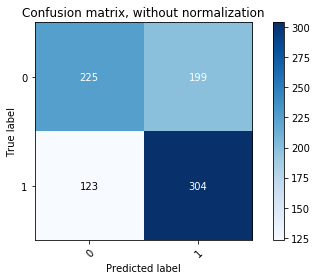

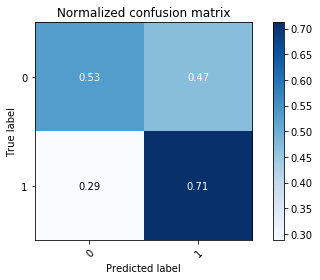

In [157]:
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

def plot_confusion_matrix(y_true, y_pred,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plot_confusion_matrix(y_test, clf_xb.predict(X_test),
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plot_confusion_matrix(y_test, clf_xb.predict(X_test), normalize=True,
                      title='Normalized confusion matrix')

plt.show()

# Summary

Based on these findings above, there are a few recommendations I would provide to solidifying the fundamentals in teaching the game to someone would be:

1) Learn what champions are better in matchups against other champions

2) The most important parts of the early game for any player is to acquire gold better than their opponent to gain advantages, and not to die to the opponent's team

3) In the later phases of the game (post 20 minutes), understanding the macro strategies becomes the main focus for winning

4) Your odds of winning a game reflect the above items, plus having teammates that are comfortable with playing their selected champion, so play champions you have practices and are comfortable with

5) Winning teams ward the map more than losing teams, so continually buy wards to provide vision for your team




# Next Steps

There are a few other analysis I would like to be able to conduct as follow ups:

1) See the impact of concept importance in winning games for different ranked tiers

2) See the impact of playing games with your friends vs playing with random people


